# MULTIPLE LINEAR REGRESSION

In [38]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import statsmodels.api as sm

In [39]:
df_tips = sns.load_dataset('tips')
df_tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [40]:
df_tips.describe(include='all')

,total_bill,tip,sex,smoker,day,time,size
count,244.000000,244.000000,244,244,244,244,244.000000
unique,NaN,NaN,2,2,4,2,NaN
top,NaN,NaN,Male,No,Sat,Dinner,NaN
freq,NaN,NaN,157,151,87,176,NaN
mean,19.785943,2.998279,NaN,NaN,NaN,NaN,2.569672
std,8.902412,1.383638,NaN,NaN,NaN,NaN,0.951100
min,3.070000,1.000000,NaN,NaN,NaN,NaN,1.000000
25%,13.347500,2.000000,NaN,NaN,NaN,NaN,2.000000
50%,17.795000,2.900000,NaN,NaN,NaN,NaN,2.000000
75%,24.127500,3.562500,NaN,NaN,NaN,NaN,3.000000


In [41]:
df_tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


### Model

In [42]:
# define features and target
X = df_tips[['total_bill', 'size']]
y = df_tips['tip']

# add constant
X = sm.add_constant(X)

In [43]:
# model OLS
model = sm.OLS(y, X)

# fitting
result = model.fit()

In [44]:
# summary of result
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.468
Model:                            OLS   Adj. R-squared:                  0.463
Method:                 Least Squares   F-statistic:                     105.9
Date:                Tue, 22 Mar 2022   Prob (F-statistic):           9.67e-34
Time:                        10:56:24   Log-Likelihood:                -347.99
No. Observations:                 244   AIC:                             702.0
Df Residuals:                     241   BIC:                             712.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6689      0.194      3.455      0.0

### Output to interpret

1. Adjusted R-square
2. Prob (F-statistics)
3. Prob (t-test) B0, B1, B2
4. Coef B0, B1, B2
---

1. Adjusted R-square

Adj R-square = 0.463 --> Artinya model (menggunkan 2 feature: total_bill dan size) dapat menjelaskan 46.3% variance dari nilai tip. Sisanya 53.7% dapat dijelaskan oleh variable lain yang tidak terdapat dalam model.

2. Prob (F-statistics)

Prob (F-statistic)= 9.67e-34. pvalue < 0.05 (Reject Ho). Artinya, minimal ada 1 feature yang berpengarus signifikan terhadap target, tapi kita tidak tahu feature yang mana.

3. Prob (t-test) B0, B1, B2

- B0 (const)        pvalue = 0.001. pvalue < 0.05. Artinya, intercept dibutuhkan dalam model.
- B1 (total_bill)   pvalue = 0.000. pvalue < 0.05. Artinya, total_bill berpengaruh signifikan secara positif terhadap tip
- B2 (size)         pvalue = 0.025. pvalue < 0.05. Artinya, size berpengaruh signifikan secara positif terhadap tip

4. Coef B0, B1, B2

y = 0.6689 + 0.0927 total_bill + 0.1926 size

- Coef B0 = 0.6689. Artinya, nilai tip adalah 0.6689 saat total_bill bernilai 0 dan size bernilai 0. (bisa diabaikan karena tidak ada transaksi yang total_billnya 0 dan sizenya 0)
- Coef B1 = 0.0927. Artinya, setiap kenaikan total_bill 1 dollar, maka tip akan bertambah sebesar 0.0927 dollar (9 cent)
- Coef B2 = 0.1926. Artinya, setiap kenaikan size 1 orang, maka tip akan bertambah sebesar 0.1926 dollar (19 cent)

**Catatan**

Interpretasi ini hanya berlaku pada rentang nilai tertentu pada masing-masing feature:
- total_bill berlaku hanya pada rentang 3.07 - 50.81 dollar
- size berlaku hanya pada rentang 1 - 6 orang

In [45]:
X.describe()

,const,total_bill,size
count,244.0,244.000000,244.000000
mean,1.0,19.785943,2.569672
std,0.0,8.902412,0.951100
min,1.0,3.070000,1.000000
25%,1.0,13.347500,2.000000
50%,1.0,17.795000,2.000000
75%,1.0,24.127500,3.000000
max,1.0,50.810000,6.000000


# MODEL DIAGNOSTIC & MULTICOLLINEARITY

- Apply multiple linear regression
- Check the normality assumption
- Check the Gauss-Markov assumption
- Check multicollinearity

### 1. Normality (Residual)

In [46]:
# get residual 
result.resid

0     -1.619340
1     -0.545394
2      0.305355
3      0.060408
4     -0.109157
         ...   
239    1.981794
240   -1.574089
241   -1.155952
242   -0.956292
243    0.204703
Length: 244, dtype: float64

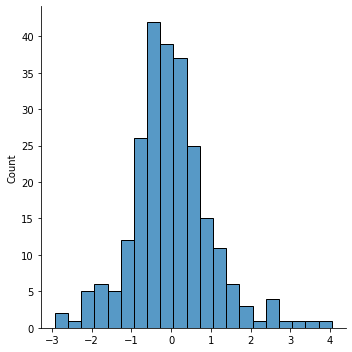

In [47]:
# check normality with histogram
sns.displot(result.resid)

# normality assumption satisfied

In [48]:
# check normality with kolmogorov smirnov test
from scipy.stats import kstest

stat, pvalue = kstest(result.resid, 'norm')
pvalue

# pvalue > 0.05, artinya residual kita asumsikan terdistribusi normal

0.12782161723223306

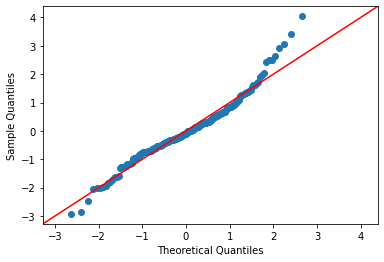

In [49]:
# check normality with qqplot
import scipy.stats as stats
import matplotlib.pyplot as plt

sm.qqplot(result.resid, stats.norm, line='45')

plt.show()

### 2. Gauss-Markov Assumption

- Rata-rata residual = 0
- Uncorrelated error 
- Constant variance/Homoscedasticity (variance dari error menyebar secara merata dari nilai y yang kecil sampai y yang besar)

In [50]:
# result.fittedvalues

In [51]:
# result.resid

Text(0.5, 1.0, 'Residual Plot')

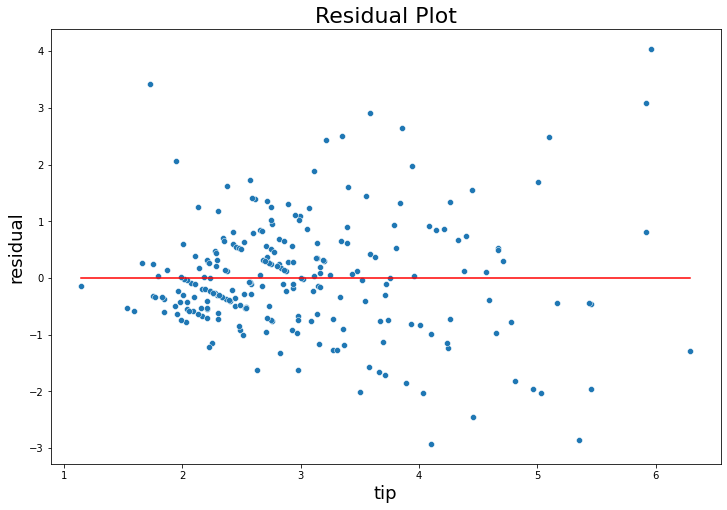

In [57]:
# residual plot
plt.figure(figsize=(12,8))

sns.scatterplot(x=result.fittedvalues, y=result.resid)
sns.lineplot(x=result.fittedvalues, y=0, color='red')

plt.xlabel('tip', size=18)
plt.ylabel('residual', size=18)
plt.title('Residual Plot', size=22)

!["test"](https://condor.depaul.edu/sjost/it223/documents/resid-plots.gif)

**Interpretasi**

1. Rata-rata residual = 0
- Terpenuhi, karena residual yang positif dan negatif jumlahnya sama (titik biru di atas dan dibawah garis merah sama banyak)

2. Uncorrelated error 
- Terpenuhi, karena tidak ada pola tertentu

3. Constant variance/Homoscedasticity (variance dari error menyebar secara merata dari nilai y yang kecil sampai y yang besar)
- Tidak terpenuhi, karena semakin besar nilai y (tip), variance residualnya semakin besar (melebar) 

### 3. Multicollinearity

In [58]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [59]:
X.head()

,const,total_bill,size
0,1.0,16.99,2
1,1.0,10.34,3
2,1.0,21.01,3
3,1.0,23.68,2
4,1.0,24.59,4


In [62]:
X.drop(columns='const')

,total_bill,size
0,16.99,2
1,10.34,3
2,21.01,3
3,23.68,2
4,24.59,4
...,...,...
239,29.03,3
240,27.18,2
241,22.67,2
242,17.82,2


In [64]:
# function untuk menghitung VIF dari tiap variable

def calc_vif(X):

    vif = pd.DataFrame()
    vif['variable'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return vif

In [66]:
calc_vif(X.drop(columns='const'))

,variable,VIF
0,total_bill,8.684373
1,size,8.684373


**Interpretasi**

VIF>4, artinya ada indikasi multicollinearity (tidak terlalu bahaya)

### Kesimpulan

1. Asumsi normailtas kita anggap terpenuhi
>- maka hasil F-test dan T-test valid

2. Asumsi Gauss Markov
>- Rata-rata error = 0 terpenuhi. Maka hasil prediksi dan koefisien regresinya tidak bias.
>- Uncorrelated error terpenuhi. Maka R-square dan p-value hasil T-test dari tiap variable X (feature) adalah tidak bias.
>- Homoscedasticity tidak terpenuhi. Maka semakin tinggi nilai tipnya, hasilnya makin tidak stabil (variance errornya makin besar)

3. Multicollinearity ada indikasi tidak terpenuhi.

>- Misal B1 (beta total_bill). Tiap kenaikan total_bill 10 dollar, maka tip akan naik 90 cent. Interpretasi ini berlaku dengan catatan variable lainnya (size) nilainya tetap.

>- Dalam kasus ini karena terjadi multicollinearity, berarti nilai variable lainnya (size) ikut berubah ketika total_billnya naik. Jadi interpretasi kita untuk coefficient kurang valid.

>- solusi: feature selection, PCA.


# DUMMY VARIABLE

In [68]:
df_tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [71]:
# define X and y

X = df_tips.drop(columns='tip')
y = df_tips['tip']

In [77]:
# create dummy variable
X = pd.get_dummies(data=X, columns=['sex', 'smoker', 'day', 'time'], drop_first=True) # drop first agar tidak terjadi multicollinearity

# add costant
X = sm.add_constant(X)

X


,const,total_bill,size,sex_Female,smoker_No,day_Fri,day_Sat,day_Sun,time_Dinner
0,1.0,16.99,2,1,1,0,0,1,1
1,1.0,10.34,3,0,1,0,0,1,1
2,1.0,21.01,3,0,1,0,0,1,1
3,1.0,23.68,2,0,1,0,0,1,1
4,1.0,24.59,4,1,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...
239,1.0,29.03,3,0,1,0,1,0,1
240,1.0,27.18,2,1,0,0,1,0,1
241,1.0,22.67,2,0,0,0,1,0,1
242,1.0,17.82,2,0,1,0,1,0,1


In [80]:
# model
model = sm.OLS(y, X)

# fitting
result = model.fit()

# print summary
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.470
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     26.06
Date:                Tue, 22 Mar 2022   Prob (F-statistic):           1.20e-28
Time:                        11:50:36   Log-Likelihood:                -347.48
No. Observations:                 244   AIC:                             713.0
Df Residuals:                     235   BIC:                             744.4
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.5908      0.256      2.310      

### Output to interpret

1. Adjusted R-square
2. Prob (F-statistics)
3. Prob (t-test) B0, B1, B2
4. Coef B0, B1, B2
---

**1. Adjusted R-square = 0.452**

- artinya model dapat menjelaskan variasi dari nilai tip sebesar 45.2%, sisanya 54.8% dijelaskan oleh variable lain yang tidak terdapat dalam model ini

**2. Prob (F-statistic) = 1.20e-28 = 0.000..0012**

- P value < 0.05, reject Ho artinya minimal salah satu variable X atau Beta ada yang berpengaruh secara signifikan terhadap tip (variable Y)

**3. Prob B0, B1, B2**

- B0 P value = 0.022, P value < 0.05, reject Ho artinya model ini butuh intercept
- B1 P value = 0.000, P value < 0.05, reject Ho artinya total_bill berpengaruh secara positif signifikan terhadap tip (variable Y)
<br><br>
- B2 P value = 0.051, P value > 0.05, Fail to reject Ho artinya size TIDAK berpengaruh secara positif signifikan terhadap tip (variable Y)
- B3 P value = 0.819, P value > 0.05, Fail to reject Ho artinya sex_Female TIDAK berpengaruh secara positif signifikan terhadap tip (variable Y)
- B4 P value = 0.556, P value > 0.05, Fail to reject Ho artinya smoker_No TIDAK berpengaruh secara positif signifikan terhadap tip (variable Y)
- B5 P value = 0.680, P value > 0.05, Fail to reject Ho artinya day_Fri TIDAK berpengaruh secara positif signifikan terhadap tip (variable Y)
- B6 P value = 0.931, P value > 0.05, Fail to reject Ho artinya day_Sat TIDAK berpengaruh secara positif signifikan terhadap tip (variable Y)
- B7 P value = 0.772, P value > 0.05, Fail to reject Ho artinya day_Sun TIDAK berpengaruh secara positif signifikan terhadap tip (variable Y)
- B8 P value = 0.878, P value > 0.05, Fail to reject Ho artinyatime_DinnerTIDAK berpengaruh secara negatif signifikan terhadap tip (variable Y)

**4. Coeff B0,B1,B2,....,B8**

tip = 0.5908 + 0.0945 total_bill + 0.1760 size + 0.0324 sex_Female + 0.0864 smoker_No + 0.1623 day_Fri + 0.0408 day_Sat + 0.1368 day_Sun - 0.0681 time_Dinner


- Coeff (intercept)     B0 = 0.5908 ---> Nilai tip adalah 0.59 ketika semua variable bernilai 0
- Coeff (total_bill)    B1 = 0.0945 ---> setiap kenaikan total_bill 1 dollar, maka tip akan naik 0.0945 dollar (9 cent)

- Coeff (size)          B2 = 0.1760 ---> setiap kenaikan size 1 orang, maka tip akan naik 0.176 dollar (17 cent)
- Coeff (sex_female)    B3 = 0.0324 ---> rata-rata tip yang diberikan oleh perempuan lebih besar 0.0324 dollar (3 cent) daripada laki-laki
- Coeff (smoker_no)     B4 = 0.0864 ---> rata-rata tip yang diberikan oleh orang yg tidak merokok lebih besar 0.0864 dollar (8 cent) dari pada yang merokok.
- Coeff (day_fri)       B5 = 0.1623 ---> rata-rata tip yang diberikan oleh pengunjung di hari jumat lebih besar 0.1623 dollar (16 cent) daripada pengunjung di hari kamis
- Coeff (day_sat)       B6 = 0.0408 ---> rata-rata tip yang diberikan oleh pengunjung di hari sabtu lebih besar 0.0408 dollar (4 cent) daripada pengunjung di hari kamis
- Coeff (day_sun)       B7 = 0.1368 ---> rata-rata tip yang diberikan oleh pengunjung di hari minggu lebih besar 0.1368 dollar (13 cent) daripada pengunjung di hari kamis
- Coeff (time_dinner)   B8 = -0.0681 --> rata-rata tip yang diberikan oleh pengunjung di waktu Dinner lebih kecil 0.0681 dollar (6 cent) daripada pengunjung di waktu Lunch

**Catatan**

- Sebenarnya Coef B2-B8 tidak perlu diinterpretasi karena pada t-test pvalue>0.05 (Failed to reject Ho). Artinya feature-feature tersebut tidak berpengaruh secara signifikan terhadap target (tip)
- Interpretasi berlaku hanya pada rentang tertentu (lihat dgn describe)

In [84]:
X.describe().loc[['min','max']]

,const,total_bill,size,sex_Female,smoker_No,day_Fri,day_Sat,day_Sun,time_Dinner
min,1.0,3.07,1.0,0.0,0.0,0.0,0.0,0.0,0.0
max,1.0,50.81,6.0,1.0,1.0,1.0,1.0,1.0,1.0


# Exercise

- Apply multiple linear regression. target = 'price'
- Check the normality assumption
- Check the Gauss-Markov assumption
- Check multicollinearity

### **Dataset info**
https://www.kaggle.com/drvader/diamonds-dataset-exploration-and-regression/data

A data frame with 53940 rows and 10 variables:

1. price<br>
price in US dollars (\$326--\$18,823)

2. carat<br>
weight of the diamond (0.2--5.01)

3. cut<br>
quality of the cut (Fair, Good, Very Good, Premium, Ideal)

4. color<br>
diamond colour, from J (worst) to D (best)

5. clarity<br>
a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

6. x<br>
length in mm (0--10.74)

7. y<br>
width in mm (0--58.9)

8. z<br>
depth in mm (0--31.8)

9. depth<br>
total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)

10. table<br>
width of top of diamond relative to widest point (43--95)

In [87]:
df = sns.load_dataset('diamonds')
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [88]:
df.corr()
# feature x, y, z bisa didrop karena berkorelasi kuat dengan feature carat

,carat,depth,table,price,x,y,z
carat,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
depth,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000
